<a href="https://colab.research.google.com/github/tracydo99/bus118/blob/main/Banking_Assistant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tenacity==9.0.0
!pip install langchain==0.3.12
!pip install langchain-openai==0.2.12
!pip install langchain_community==0.3.12
!pip install langgraph==0.2.59
!pip install pysqlite3-binary==0.5.4
!pip install langchain_chroma==0.1.4
!pip install pandas==2.2.2
!pip install pypdf==5.1.0
!pip install nbformat==5.10.4

  Using cached langchain_core-0.3.79-py3-none-any.whl.metadata (3.2 kB)
  Using cached langsmith-0.2.11-py3-none-any.whl.metadata (14 kB)
INFO: pip is looking at multiple versions of langchain-core to determine which version is compatible with other requirements. This could take a while.
  Using cached langchain_core-0.3.78-py3-none-any.whl.metadata (3.2 kB)
  Using cached langchain_core-0.3.77-py3-none-any.whl.metadata (3.2 kB)
  Using cached langchain_core-0.3.76-py3-none-any.whl.metadata (3.7 kB)
  Using cached langchain_core-0.3.75-py3-none-any.whl.metadata (5.7 kB)
  Using cached langchain_core-0.3.74-py3-none-any.whl.metadata (5.8 kB)
  Using cached langchain_core-0.3.73-py3-none-any.whl.metadata (5.8 kB)
  Using cached langchain_core-0.3.72-py3-none-any.whl.metadata (5.8 kB)
INFO: pip is still looking at multiple versions of langchain-core to determine which version is compatible with other requirements. This could take a while.
  Using cached langchain_core-0.3.71-py3-none-any.

In [ ]:
!pip install pydantic==2.7.4

In [ ]:
%pip install openai

In [ ]:
!pip install --upgrade chromadb langchain-chroma

  Using cached chromadb-1.2.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.2 kB)
  Using cached langchain_chroma-1.0.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached langchain_core-1.0.0-py3-none-any.whl.metadata (3.4 kB)
Using cached chromadb-1.2.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (20.7 MB)
Using cached langchain_chroma-1.0.0-py3-none-any.whl (12 kB)
Using cached langchain_core-1.0.0-py3-none-any.whl (467 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.3/397.3 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.2.11
    Uninstalling langsmith-0.2.11:
      Successfully uninstalled langsmith-0.2.11
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.63
    Uninstalling langchain-core-0.3.63:
      Successfully uninstalled langchain-core-0.3.63
  Attempting uninstall: chromadb
    Found existing installation: chromadb 0.5.23
    Uninstalling ch

In [ ]:
import os
from google.colab import userdata

# Set the environment variable using the key stored in Colab's secrets manager
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

In [ ]:
from langchain_core.tools import tool

#Tool annotation identifies a function as a tool automatically
@tool
def find_sum(x:int, y:int) -> int :
    #The docstring comment describes the capabilities of the function
    #It is used by the agent to discover the function's inputs, outputs and capabilities
    """
    This function is used to add two numbers and return their sum.
    It takes two integers as inputs and returns an integer as output.
    """
    return x + y

@tool
def find_product(x:int, y:int) -> int :
    """
    This function is used to multiply two numbers and return their product.
    It takes two integers as inputs and returns an integer as ouput.
    """
    return x * y

In [ ]:
from langgraph.prebuilt import create_react_agent
from langchain_core.messages import AIMessage,HumanMessage,SystemMessage
from langchain_openai.chat_models import ChatOpenAI

In [ ]:
agent_graph=create_react_agent(
    model=model,
    state_modifier=system_prompt,
    tools=agent_tools,
    debug=True)

inputs = {"messages":[("user","what is the sum of 2 and 3 ?")]}

result = agent_graph.invoke(inputs)

[-1:checkpoint] State at the end of step -1:
{'messages': []}
[0:tasks] Starting 1 task for step 0:
- __start__ -> {'messages': [('user', 'what is the sum of 2 and 3 ?')]}
[0:writes] Finished step 0 with writes to 1 channel:
- messages -> [('user', 'what is the sum of 2 and 3 ?')]
[0:checkpoint] State at the end of step 0:
{'messages': [HumanMessage(content='what is the sum of 2 and 3 ?', additional_kwargs={}, response_metadata={}, id='c60da667-18c1-4096-b8d2-527fe0f43eda')]}
[1:tasks] Starting 1 task for step 1:
- agent -> {'is_last_step': False,
 'messages': [HumanMessage(content='what is the sum of 2 and 3 ?', additional_kwargs={}, response_metadata={}, id='c60da667-18c1-4096-b8d2-527fe0f43eda')],
 'remaining_steps': 24}
[1:writes] Finished step 1 with writes to 1 channel:
- messages -> [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_w1J9e4MHboPdrCdtDQKc3fg5', 'function': {'arguments': '{"x":2,"y":3}', 'name': 'find_sum'}, 'type': 'function'}], 'refusal': None}

In [ ]:
import pandas as pd
from langchain_core.tools import tool

banking_df = pd.read_csv("Banking_Rates_Limits.csv")
print(banking_df)

@tool
def get_banking_value(item_name:str) -> str :
    """
    Returns the specific value (rate, limit, or fee) for a banking item
    (e.g., 'Savings Account Interest Rate', 'Daily ATM Withdrawal Limit').
    Returns 'NOT FOUND' if no match.
    """
    # ... logic to filter banking_df["Name"] and return the "Value" and "Unit"
    # Example: filter for 'Savings Account Interest Rate', return '0.04 APR'

      Type                              Name      Value Unit
0  Account  Checking Account Minimum Deposit     50.000  USD
1  Account     Savings Account Interest Rate      0.040  APR
2     Loan        Standard Personal Loan APR      0.080  APR
3     Loan               Maximum Loan Amount  50000.000  USD
4  Account        Daily ATM Withdrawal Limit    500.000  USD
5  Account                     Overdraft Fee     35.000  USD
6     Loan           Mortgage Loan Base Rate      0.065  APR
7  Account          Online Transaction Limit  10000.000  USD


In [ ]:
banking_features_df = pd.read_csv("Banking_Info_Features.csv")

# Create a list of documents for the vector store
from langchain_core.documents import Document

banking_docs = []
for index, row in banking_features_df.iterrows():
    # Combine Category, Item Name, and Features/Description into a single document content
    content = f"Category: {row['Category']}. Product/Process: {row['Item Name']}. Details: {row['Features/Description']}"
    # Create the Document object
    banking_docs.append(Document(page_content=content, metadata={"source": "Banking_Info_Features.csv", "item": row['Item Name']}))

In [ ]:
import pandas as pd
from langchain_core.tools import tool
from langchain_core.documents import Document
from langchain.tools.retriever import create_retriever_tool
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langgraph.prebuilt import create_react_agent
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.messages import SystemMessage

# ====================================================================
# 1. DEFINE TOOLS AND LOAD DATA
# ====================================================================

# --- Tool 1: Get Banking Rate/Limit (Equivalent to get_laptop_price) ---
try:
    # Adjust the path if your files are in a specific folder like 'data/'
    banking_rates_df = pd.read_csv("Banking_Rates_Limits.csv")
except FileNotFoundError:
    print("ERROR: Banking_Rates_Limits.csv not found. Please ensure it is uploaded.")
    raise

@tool
def get_banking_rate_limit(item_name: str) -> str:
    """
    Returns the specific value (rate, limit, or fee) for a banking item
    (e.g., 'Savings Account Interest Rate', 'Maximum Loan Amount').
    It performs a case-insensitive substring match. Returns 'NOT FOUND' if no match.
    """
    # Use .str.contains() for flexible matching
    match_records_df = banking_rates_df[
        banking_rates_df["Name"].str.contains(item_name, case=False)
    ]

    if len(match_records_df) == 0:
        return "NOT FOUND"
    else:
        # Get the first match
        record = match_records_df.iloc[0]
        return f"{record['Value']} {record['Unit']} for {record['Name']}"

# --- Tool 2: Get Banking Features (Equivalent to get_product_features from PDF) ---
try:
    banking_features_df = pd.read_csv("Banking_Info_Features.csv")
except FileNotFoundError:
    print("ERROR: Banking_Info_Features.csv not found. Please ensure it is uploaded.")
    raise

# 1. Convert DataFrame rows into LangChain Document objects
banking_docs = []
for index, row in banking_features_df.iterrows():
    content = f"Category: {row['Category']}. Product/Process: {row['Item Name']}. Details: {row['Features/Description']}"
    banking_docs.append(Document(page_content=content, metadata={"source": "Banking_Info_Features", "item": row['Item Name']}))

# 2. Setup Vector Store
# NOTE: You must initialize your embeddings model
embedding = OpenAIEmbeddings(model="text-embedding-3-small")
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1024, chunk_overlap=256)
splits = text_splitter.split_documents(banking_docs)

# Create a vector store with Chroma
banking_feature_store = Chroma.from_documents(
    documents=splits,
    embedding=embedding
)

# 3. Create the retriever tool
get_banking_features_tool = create_retriever_tool(
    banking_feature_store.as_retriever(search_kwargs={"k": 1}),
    name="Get_Banking_Details",
    description="""
    This store contains detailed information about banking products and processes.
    Use this to get descriptions of accounts, loans, fraud examples, or requirements
    for opening an account.
    """
)

# Combine all tools
banking_tools = [get_banking_rate_limit, get_banking_features_tool]


# ====================================================================
# 2. AGENT SETUP (Equivalent to the final section of your example code)
# ====================================================================

# NOTE: Define your LLM model instance (e.g., model = ChatOpenAI(temperature=0))
# For this code to run, you need to define 'model'.
# For example:
# from langchain_openai import ChatOpenAI
# model = ChatOpenAI(model="gpt-4o-mini", temperature=0)

# Create a System prompt to provide a persona to the chatbot
system_prompt = SystemMessage("""
    You are a professional and helpful **Banking Assistant** 🏦.
    Your role is to answer user questions about accounts, loans, fraud, and banking processes.
    To answer questions about banking products and numbers, you will **ONLY** use the available tools and **NOT** your own memory.
    You will handle small talk and greetings by producing polite and professional responses.
    """)

# Create memory across questions in a conversation (conversation memory)
checkpointer = MemorySaver()

# Create the Banking QnA Agent
banking_QnA_agent = create_react_agent(
                                model=model,               # LLM to use (must be defined)
                                tools=banking_tools,       # The list of banking tools
                                state_modifier=system_prompt, # The system prompt
                                debug=False,
                                checkpointer=checkpointer
)

In [ ]:
import uuid
from langchain_core.messages import HumanMessage # Ensure this is imported

# --- Setup Chat Thread ---
# To maintain memory, each request should be in the context of a thread.
# Each user conversation will use a separate thread ID.
# NOTE: The agent will use this thread ID to store and retrieve memory.
thread_id = str(uuid.uuid4())
config = {"configurable": {"thread_id": thread_id}}
print(f"Starting new conversation thread: {thread_id}\n")

# --- Test Input (Banking Use Case) ---
# Create an input message relevant to your banking assistant.
inputs = {"messages":[
                HumanMessage("What is the interest rate for the Savings Account and what are the features of the Personal Flex Loan?")
            ]}

# Use streaming to print responses as the agent does the work.
# This is an alternate way to stream agent responses without waiting for the agent to finish.
print("AGENT RESPONSE (Streaming):")
print("-" * 30)
for stream in banking_QnA_agent.stream(inputs, config, stream_mode="values"):
    # The stream produces states, we only care about the final message
    message = stream["messages"][-1]

    # Check if the output is a standard LangChain message or an intermediate tuple
    if isinstance(message, tuple):
        # This often prints tool calls or intermediate steps if debug is true
        # print(message)
        pass
    else:
        # Print the final output content
        # Note: If streaming is working correctly, this will print chunks of the final message
        print(message.content, end="", flush=True)

print("\n" + "-" * 30)
print("Conversation stream ended.")

Starting new conversation thread: 75e69040-6334-4304-9a3b-9c97b5b1c204

AGENT RESPONSE (Streaming):
------------------------------
What is the interest rate for the Savings Account and what are the features of the Personal Flex Loan?Category: Loan. Product/Process: Personal Flex Loan. Details: Offers flexible repayment schedules from 12 to 60 months. Can be used for debt consolidation or large purchases. Requires a credit score of 680 or higher for best rates.The interest rate for the Savings Account is **0.04% APR**.

As for the **Personal Flex Loan**, here are its features:
- **Flexible Repayment Schedules**: You can choose repayment terms ranging from 12 to 60 months.
- **Usage**: It can be utilized for debt consolidation or large purchases.
- **Credit Score Requirement**: A credit score of 680 or higher is needed to qualify for the best rates. 

If you have any more questions or need further assistance, feel free to ask!
------------------------------
Conversation stream ended.


In [ ]:
import uuid
from langchain_core.messages import HumanMessage # Ensure this is imported

# --- Setup Conversation Inputs (Banking Use Case) ---
# This sequence simulates a multi-turn conversation with your banking assistant.
user_inputs = [
    "Hello",
    "I am interested in opening a new account. What do I need to do?",
    "That sounds good. How much is the daily ATM withdrawal limit?",
    "Tell me about the features of the Personal Flex Loan.",
    "What is the Standard Personal Loan APR?",
    "I have an unknown transaction on my account!",
    "Thanks for the help, goodbye."
]

# --- Run Conversation Simulation ---
# Create a new thread for this conversation to ensure memory is isolated.
thread_id = str(uuid.uuid4())
config = {"configurable": {"thread_id": thread_id}}
print(f"--- Starting new Banking Conversation Thread: {thread_id} ---\n")

for input_message in user_inputs:
    print(f"----------------------------------------\nUSER : {input_message}")

    # Format the user message
    user_message = {"messages": [HumanMessage(input_message)]}

    # Get response from the agent (invoking is non-streaming)
    ai_response = banking_QnA_agent.invoke(user_message, config=config)

    # Print the response
    print(f"AGENT : {ai_response['messages'][-1].content}")

print("\n--- Conversation Simulation Complete ---")

--- Starting new Banking Conversation Thread: 1e692bfe-ce51-40d1-b365-8225300eb102 ---

----------------------------------------
USER : Hello
AGENT : Hello! How can I assist you today?
----------------------------------------
USER : I am interested in opening a new account. What do I need to do?
AGENT : To open a new account, you will need the following:

1. A government-issued ID (such as a Driver's License or Passport).
2. Proof of address (like a utility bill).
3. Your Social Security Number.

The process can typically be completed online in under 10 minutes. If you have any more questions or need further assistance, feel free to ask!
----------------------------------------
USER : That sounds good. How much is the daily ATM withdrawal limit?
AGENT : The daily ATM withdrawal limit is $500. If you have any more questions or need further assistance, just let me know!
----------------------------------------
USER : Tell me about the features of the Personal Flex Loan.
AGENT : The Perso

In [ ]:
from langchain_core.messages import HumanMessage # Ensure this is imported

def execute_prompt(user, agent, config, prompt):
    # CORRECT: Pass the HumanMessage object directly inside the dictionary's 'messages' key
    inputs = {"messages": [HumanMessage(content=prompt)]}

    # Use the specific agent passed in (e.g., banking_QnA_agent)
    ai_response = agent.invoke(inputs, config=config)

    print(f"\n{user}: {ai_response['messages'][-1].content}")

# ----------------------------------------------------------------------
# ADAPTED BANKING TEST
# ----------------------------------------------------------------------

# NOTE: Replace 'product_QnA_agent' with your 'banking_QnA_agent'
AGENT = banking_QnA_agent

# Create different session threads for 2 users
config_A = {"configurable": {"thread_id": str(uuid.uuid4())}}
config_B = {"configurable": {"thread_id": str(uuid.uuid4())}}

print(f"User A Thread: {config_A['configurable']['thread_id']}")
print(f"User B Thread: {config_B['configurable']['thread_id']}")
print("-" * 50)

# Test both threads with banking-specific inputs

# USER A: Start with a descriptive query (should use Get_Banking_Details)
execute_prompt("USER A", AGENT, config_A, "Tell me about the features of the Smart Savings Account")

# USER B: Start with a descriptive query (should use Get_Banking_Details)
execute_prompt("USER B", AGENT, config_B, "Tell me the requirements for Opening an Account")

# USER A: Follow up with a rate query, relying on context (should use get_banking_rate_limit)
execute_prompt("USER A", AGENT, config_A, "What is the minimum deposit required?")

# USER B: Follow up with a rate query, relying on context (should use get_banking_rate_limit)
execute_prompt("USER B", AGENT, config_B, "What is the maximum loan amount I can get?")

User A Thread: 23827fdc-f0cb-4c52-bb0b-9c9b1787f5df
User B Thread: 0e405ff8-253b-4cb2-ace9-81acd9880897
--------------------------------------------------

USER A: The Smart Savings Account offers several features, including:

- **High-yield interest rate**: This account provides a competitive interest rate to help your savings grow.
- **No monthly maintenance fees**: You can avoid fees by maintaining a minimum balance of $500.
- **Automatic savings transfer options**: This feature allows you to set up automatic transfers to help you save consistently.

It's particularly well-suited for long-term savings goals. If you have any more questions or need further details, feel free to ask!

USER B: To open a new account, you will need the following requirements:

1. A government-issued ID (such as a Driver's License or Passport).
2. Proof of address (like a utility bill).
3. Your Social Security Number.

The process can typically be completed online in under 10 minutes. If you have any more 

In [ ]:
import pandas as pd
from langchain_core.tools import tool

# --- 1. Define the Banking Transaction Data (Simulating a CSV Load) ---
data = {
    "Transaction ID": ["LOAN-1001", "TRX-5532", "LOAN-1002", "TRX-5533", "LOAN-1003"],
    "Product Type": ["Personal Loan", "Wire Transfer", "Mortgage", "Fraud Alert", "Auto Loan"],
    "Requested Amount": [15000, 7500, 350000, 250, 45000],
    "Approval Status": ["Pending", "Completed", "Approved", "Blocked", "Pending"]
}
banking_transactions_df = pd.DataFrame(data)

# NOTE: This is the DataFrame your tools will use
# print(banking_transactions_df)

In [ ]:
@tool
def get_transaction_details(transaction_id: str) -> str:
    """
    This function returns details about a banking transaction or loan application,
    given a unique Transaction ID.
    It performs an exact match on the input ID.
    If a match is found, it returns the product type, requested amount, and approval status.
    If there is NO match found, it returns 'NOT FOUND'.
    """
    # Filter Dataframe for Transaction ID
    match_df = banking_transactions_df[
        banking_transactions_df["Transaction ID"] == transaction_id
    ]

    # Check if a record was found, if not return 'NOT FOUND'
    if len(match_df) == 0:
        return "NOT FOUND"
    else:
        # Return the details as a dictionary string for clear output
        return match_df.iloc[0].to_dict()

# Test (requires commenting out @tool)
# print(get_transaction_details("LOAN-1002"))
# print(get_transaction_details("TRX-9999"))

In [ ]:
@tool
def update_loan_amount(loan_id: str, new_amount: int) -> bool:
    """
    This function updates the Requested Amount for a given Loan ID.
    It returns True if the update was successful (record found and updated).
    It returns False if there are no matching loans found.
    """
    # Find if matching record exists
    match_df = banking_transactions_df[
        banking_transactions_df["Transaction ID"] == loan_id
    ]

    # Check if a record was found
    if len(match_df) == 0:
        return False
    else:
        # Check if the transaction type is a loan (optional but good practice)
        if not match_df.iloc[0]["Product Type"].lower().endswith("loan"):
            return False # Or return a specific message about type mismatch

        # Update the 'Requested Amount' column for the matching loan ID
        banking_transactions_df.loc[
            banking_transactions_df["Transaction ID"] == loan_id,
            "Requested Amount",
        ] = new_amount
        return True

# Test (requires commenting out @tool)
# print(update_loan_amount("LOAN-1001", 20000))
# print(get_transaction_details("LOAN-1001")) # Should show 20000 now
# print(update_loan_amount("TRX-5532", 100)) # Should fail (not a loan)
# print(update_loan_amount("LOAN-9999", 5000))

Banking Assistant Agent successfully initialized!


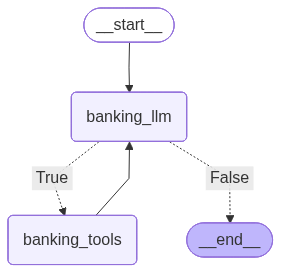

In [ ]:
from langgraph.graph import StateGraph, END
from langgraph.checkpoint.memory import MemorySaver
from typing import TypedDict, Annotated, Dict
import operator
from langchain_core.messages import AnyMessage, SystemMessage, HumanMessage, ToolMessage
from IPython.display import Image
import json

# ====================================================================
# NOTE: ASSUMPTIONS - You must ensure these are defined and imported:
# 1. model (e.g., an initialized ChatOpenAI instance)
# 2. get_transaction_details (your banking retrieval tool)
# 3. update_loan_amount (your banking modification tool)
# 4. get_banking_rate_limit (your banking rate retrieval tool)
# 5. get_banking_features_tool (your banking RAG tool)
# ====================================================================


# -----------------------------------------------------------------------------
# 1. Agent State
# -----------------------------------------------------------------------------
# An Agent State class that keeps state of the agent while it answers a query
class BankingAgentState(TypedDict):
    """The state of the banking assistant, containing the conversation history."""
    messages: Annotated[list[AnyMessage], operator.add]

# -----------------------------------------------------------------------------
# 2. Agent Class
# -----------------------------------------------------------------------------
class BankingAssistant:
    """An agent class that manages all banking-related agentic interactions."""

    # Setup the agent graph, tools, and memory
    def __init__(self, model, tools, system_prompt: str, debug: bool):

        self.system_prompt = system_prompt
        self.debug = debug

        # Setup tools dictionary for easy lookup
        self.tools: Dict[str, callable] = {tool.name: tool for tool in tools}
        if self.debug:
            print("\nTools loaded :", self.tools)

        # Attach tools to model for function calling capability
        self.model = model.bind_tools(tools)

        # Setup the graph for the agent manually
        agent_graph = StateGraph(BankingAgentState)
        agent_graph.add_node("banking_llm", self.call_llm)
        agent_graph.add_node("banking_tools", self.call_tools)

        # Conditional edge: LLM output determines if a tool call is needed
        agent_graph.add_conditional_edges(
            "banking_llm",
            self.is_tool_call,
            {True: "banking_tools", False: END}
        )

        # Edge: After tools run, return to LLM to formulate the final answer
        agent_graph.add_edge("banking_tools", "banking_llm")

        # Set where there graph starts
        agent_graph.set_entry_point("banking_llm")

        # Add chat memory
        self.memory = MemorySaver()

        # Compile the graph
        self.agent_graph = agent_graph.compile(checkpointer=self.memory)

    # Call the LLM with the messages to get next action/result
    def call_llm(self, state: BankingAgentState):

        messages = state["messages"]

        # If system prompt exists, add to messages in the front
        if self.system_prompt:
            # We only add the system prompt if it's not already the first message
            # to prevent redundancy in the state history sent to the model.
            if not isinstance(messages[0], SystemMessage):
                messages = [SystemMessage(content=self.system_prompt)] + messages

        # Invoke the model with the message history
        result = self.model.invoke(messages)
        if self.debug:
            print(f"\nLLM Returned : {result}")

        # Return the LLM output
        return {"messages": [result]}


    # Check if the next action is a tool call.
    def is_tool_call(self, state: BankingAgentState):
        last_message = state["messages"][-1]
        # Check for existence of tool_calls, which is a list on an AIMessage
        if last_message.tool_calls:
            return True
        else:
            return False

    # Execute the tool requested with the given parameters
    def call_tools(self, state: BankingAgentState):
        # Get last message's tool calls
        tool_calls = state["messages"][-1].tool_calls
        results = []

        # Multiple tool calls may be requested. Execute one by one
        for tool_call in tool_calls:
            tool_name = tool_call["name"]
            tool_args = tool_call["args"]

            # Handle tool missing error
            if tool_name not in self.tools:
                print(f"Unknown tool name {tool_name}")
                result = "Invalid tool found. Please retry"
            else:
                # Call the tool and collect results
                try:
                    result = self.tools[tool_name].invoke(tool_args)
                except Exception as e:
                    result = f"Error executing tool {tool_name}: {e}"

            # Append results as a ToolMessage
            results.append(ToolMessage(tool_call_id=tool_call['id'],
                                       name=tool_name,
                                       content=str(result)))

        if self.debug:
            print(f"\nTools returned {results}")

        # Return all tool results
        return {"messages": results}


# -----------------------------------------------------------------------------
# 3. Setup and Initialization
# -----------------------------------------------------------------------------
# Setup the custom system prompt for the banking domain
system_prompt = """
    You are a professional and courteous **Banking Assistant** 🏦.
    Your capabilities include:
    1. Retrieving specific rates, fees, and limits (e.g., ATM limits, interest rates).
    2. Retrieving detailed feature descriptions (e.g., loan types, account benefits).
    3. Retrieving details about specific loan applications or transactions.
    4. Modifying the requested amount for a loan application.

    You will **ONLY** use the available tools to answer data-specific questions.
    You must handle loan and transaction inquiries professionally.
    You will handle small talk and greetings by producing polite and professional responses.
    """

# Create a list of ALL your banking tools
# NOTE: Ensure these functions are defined in your notebook scope.
banking_tools = [
    get_transaction_details,
    update_loan_amount,
    get_banking_rate_limit,
    get_banking_features_tool
]

# Create the custom banking assistant agent
banking_assistant = BankingAssistant(
    model, # Assumes 'model' is defined
    banking_tools,
    system_prompt,
    debug=False
)

print("Banking Assistant Agent successfully initialized!")

Image(banking_assistant.agent_graph.get_graph().draw_mermaid_png())

In [ ]:
import uuid
from langchain_core.messages import HumanMessage # Ensure this is imported

# --- Define Banking Conversation Inputs ---
user_inputs = [
    "How are you doing?", # Test small talk
    "Please show me the details of transaction LOAN-1001", # Test retrieval
    "Can you increase the requested amount on that loan to 20000?", # Test modification (relies on memory)
    "Can you show me the details again?", # Test retrieval to confirm update (relies on memory)
    "What about transaction TRX-5533?", # Test retrieval of a different item (Fraud Alert)
    "Bye" # Test small talk/ending
]

# --- Run Conversation Simulation ---
# Create a new thread for this conversation to ensure memory is isolated.
thread_id = str(uuid.uuid4())
config = {"configurable": {"thread_id": thread_id}}
print(f"--- Starting new Banking Conversation Thread: {thread_id} ---\n")
print("NOTE: The agent should remember the transaction ID (LOAN-1001) in step 3 and 4.")

for input_message in user_inputs:
    print(f"----------------------------------------\nUSER : {input_message}")

    # Format the user message
    user_message = {"messages": [HumanMessage(input_message)]}

    # Get response from the agent (using the compiled graph's invoke method)
    # NOTE: Using banking_assistant.agent_graph.invoke as in your original example
    ai_response = banking_assistant.agent_graph.invoke(user_message, config=config)

    # Print the response
    print(f"\nAGENT : {ai_response['messages'][-1].content}")

print("\n--- Conversation Simulation Complete ---")

--- Starting new Banking Conversation Thread: 6905b123-dd52-4826-9792-32eea9e39b14 ---

NOTE: The agent should remember the transaction ID (LOAN-1001) in step 3 and 4.
----------------------------------------
USER : How are you doing?

AGENT : Thank you for asking! I'm here and ready to assist you with any banking inquiries you may have. How can I help you today?
----------------------------------------
USER : Please show me the details of transaction LOAN-1001

AGENT : Here are the details for transaction ID **LOAN-1001**:

- **Product Type:** Personal Loan
- **Requested Amount:** $15,000
- **Approval Status:** Pending

If you need further assistance, feel free to ask!
----------------------------------------
USER : Can you increase the requested amount on that loan to 20000?

AGENT : The requested amount for loan ID **LOAN-1001** has been successfully increased to **$20,000**. If you have any more questions or need further assistance, just let me know!
-------------------------------

In [ ]:
import functools
from langchain_core.messages import AIMessage, ToolMessage, AnyMessage, SystemMessage, HumanMessage
from typing import TypedDict, Annotated, List
from langgraph.graph import StateGraph, END
from langgraph.checkpoint.memory import MemorySaver
import operator
import uuid
# from IPython.display import Image # Uncomment this if running in Colab/Jupyter

# ====================================================================
# ASSUMPTIONS: The following MUST be defined in previous cells:
# - model (AzureChatOpenAI instance)
# - banking_qna_node (The partial function for Banking QnA Agent)
# - transaction_management_node (The partial function for Transaction Agent)
# - banking_QnA_agent and banking_assistant (the agents themselves)
# ====================================================================

In [ ]:
# ----------------------------------------------------------------------
# 1. HELPER NODE FUNCTION (Used by the Router to call the downstream agents)
# ----------------------------------------------------------------------
# NOTE: Using the robust function developed in the previous step.

def banking_agent_node(state: dict, agent, name: str, config: dict):
    """
    Helper function to invoke a compiled LangGraph agent
    with conversation memory via thread_id (using 'configurable' key).
    """
    # LangGraph checkpointer typically looks for 'thread_id' inside 'configurable'
    thread_id = config["configurable"]["thread_id"]
    agent_config = {"configurable": {"thread_id": thread_id}}

    # Agents built with create_react_agent or custom graphs expect a dict like {'messages': [...]}
    result = agent.invoke(state, agent_config)

    # Convert the agent output into a format suitable to append to the global state
    final_message = result['messages'][-1]

    # We always ensure the final result is an AIMessage (or ToolMessage if applicable)
    if isinstance(final_message, ToolMessage):
        final_result = final_message
    else:
        final_result = AIMessage(final_message.content)

    return {
        "messages": [final_result]
    }


# Create the Banking QnA node (Handles rates, limits, features, etc.)
banking_qna_node = functools.partial(
    banking_agent_node,
    agent=banking_QnA_agent,
    name="Banking_QnA_Agent"
)

# Create the Transaction/Loan Management node (Handles details, updates, etc.)
transaction_management_node = functools.partial(
    banking_agent_node,
    agent=banking_assistant.agent_graph,
    name="Transaction_Management_Agent"
)

In [ ]:
# ----------------------------------------------------------------------
# 2. ROUTER AGENT STATE AND CLASS
# ----------------------------------------------------------------------

class RouterAgentState(TypedDict):
    """The state for the router, tracking all messages."""
    messages: Annotated[list[AnyMessage], operator.add]

class RouterAgent:

    def __init__(self, model, system_prompt, smalltalk_prompt, debug=False):

        self.system_prompt=system_prompt
        self.smalltalk_prompt=smalltalk_prompt
        self.model=model
        self.debug=debug

        router_graph=StateGraph(RouterAgentState)
        router_graph.add_node("Router",self.call_llm)

        # NOTE: Using the banking-specific node variables
        router_graph.add_node("BANKING_QNA", banking_qna_node)
        router_graph.add_node("TRANSACTION", transaction_management_node)
        router_graph.add_node("Small_Talk", self.respond_smalltalk)

        router_graph.add_conditional_edges(
            "Router",
            self.find_route,
            {
             "BANKING_QNA": "BANKING_QNA",
             "TRANSACTION" : "TRANSACTION",
             "SMALLTALK" : "Small_Talk",
             "END": END
            }
        )

        # One way routing to END after the destination agent finishes
        router_graph.add_edge("BANKING_QNA",END)
        router_graph.add_edge("TRANSACTION",END)
        router_graph.add_edge("Small_Talk",END)

        # Set where there graph starts
        router_graph.set_entry_point("Router")
        self.router_graph = router_graph.compile()

    def call_llm(self, state:RouterAgentState):
        messages=state["messages"]
        if self.debug:
            print(f"Router LLM received {messages}")

        # Add the routing system prompt
        messages = [SystemMessage(content=self.system_prompt)] + messages

        # invoke the model with the message history
        result = self.model.invoke(messages)

        if self.debug:
            print(f"Router LLM result {result}")
        return { "messages":[result] }

    def respond_smalltalk(self, state:RouterAgentState):
        messages=state["messages"]
        if self.debug:
            print(f"Small talk received: {messages}")

        # Add the small talk system prompt
        messages = [SystemMessage(content=self.smalltalk_prompt)] + messages

        # invoke the model with the message history
        result = self.model.invoke(messages)

        if self.debug:
            print(f"Small talk result {result}")
        return { "messages":[result] }

    def find_route(self, state:RouterAgentState):
        last_message = state["messages"][-1]

        # The LLM's output content is the destination tag
        destination=last_message.content

        if self.debug:
            print(f"Destination chosen : {destination}")
        return destination

In [ ]:
# ----------------------------------------------------------------------
# 3. SETUP & EXECUTION
# ----------------------------------------------------------------------

# Setup the system prompts for the Banking Router
system_prompt = """ You are a Router for a Banking Assistant. Analyze the user query and choose one of 4 options:
BANKING_QNA: If the query asks for general banking information, rates, fees, limits, or product features (e.g., 'What is the savings account rate?', 'features of Personal Flex Loan').
TRANSACTION: If the query asks about a specific loan/transaction ID, status, or requests an update (e.g., 'What is the status of LOAN-1001?', 'Can you update the amount?').
SMALLTALK: If the user input is a greeting, farewell, or simple politeness (e.g., 'Hello', 'Thanks for the help', 'How are you?').
END: Default, when the query is irrelevant or outside banking scope.

The output must be only one word out of the possible 4: BANKING_QNA, TRANSACTION, SMALLTALK, END."""

smalltalk_prompt="""If the user request is small talk, like greetings and goodbyes, respond professionally and courteously. Mention that you can answer questions about banking products, rates, and assist with specific loan or transaction inquiries."""

router_agent = RouterAgent(
    model, # Assumes 'model' is defined
    system_prompt,
    smalltalk_prompt,
    debug=False # Set to True to see routing steps
)

print("Banking Router Agent Setup Complete.")

# Visualize the Agent (optional)
# Image(router_agent.router_graph.get_graph().draw_mermaid_png())

print("\n--- Testing Router Functionality ---")
# Test 1: SMALLTALK
messages_1 = [HumanMessage(content="Good morning, I have a quick question.")]
result_1 = router_agent.router_graph.invoke({"messages": messages_1}, {"configurable": {"thread_id": str(uuid.uuid4())}})
print(f"Input: {messages_1[0].content}\nAgent Response: {result_1['messages'][-1].content}\n")

# Test 2: BANKING_QNA
messages_2 = [HumanMessage(content="What is the interest rate for the Savings Account?")]
result_2 = router_agent.router_graph.invoke({"messages": messages_2}, {"configurable": {"thread_id": str(uuid.uuid4())}})
print(f"Input: {messages_2[0].content}\nAgent Response: {result_2['messages'][-1].content}\n")

# Test 3: TRANSACTION
messages_3 = [HumanMessage(content="What is the status of LOAN-1002?")]
result_3 = router_agent.router_graph.invoke({"messages": messages_3}, {"configurable": {"thread_id": str(uuid.uuid4())}})
print(f"Input: {messages_3[0].content}\nAgent Response: {result_3['messages'][-1].content}\n")

Banking Router Agent Setup Complete.

--- Testing Router Functionality ---
Input: Good morning, I have a quick question.
Agent Response: Good morning! I'm here to help. What question do you have? Feel free to ask about banking products, rates, or any specific loan or transaction inquiries you might need assistance with.

Input: What is the interest rate for the Savings Account?
Agent Response: The interest rate for the Savings Account is 0.04% APR.

Input: What is the status of LOAN-1002?
Agent Response: The status of LOAN-1002 is as follows:

- **Product Type:** Mortgage
- **Requested Amount:** $350,000
- **Approval Status:** Approved



In [ ]:
# ----------------------------------------------------------------------
# 4. FULL CONVERSATION SIMULATION (Tests memory across the TRANSACTION agent)
# ----------------------------------------------------------------------

print("\n--- Full Conversation Simulation (Testing Memory) ---")
user_inputs = [
    "How are you doing?", # SMALLTALK
    "What is the daily ATM withdrawal limit?", # BANKING_QNA
    "Please show me the details of transaction LOAN-1001", # TRANSACTION
    "Can you increase the requested amount on that loan to 20000?", # TRANSACTION (Memory Test)
    "Thanks for the help", # SMALLTALK
    "I need a summary of the Personal Flex Loan features." # BANKING_QNA
]

# Create a new thread for the whole sequence
config = {"configurable": {"thread_id": str(uuid.uuid4())}}
print(f"Starting Thread: {config['configurable']['thread_id']}")

for input in user_inputs:
    print(f"----------------------------------------\nUSER : {input}")
    # Format the user message
    user_message = {"messages":[HumanMessage(content=input)]}

    # Get response from the agent
    ai_response = router_agent.router_graph.invoke(user_message,config=config)

    # Print the response
    print(f"\nAGENT : {ai_response['messages'][-1].content}")


--- Full Conversation Simulation (Testing Memory) ---
Starting Thread: 60fd782c-1962-41e5-8193-a2051634a6b5
----------------------------------------
USER : How are you doing?

AGENT : I'm doing well, thank you for asking! How about you? If you have any questions about banking products, rates, or need assistance with specific loan or transaction inquiries, feel free to ask!
----------------------------------------
USER : What is the daily ATM withdrawal limit?

AGENT : The daily ATM withdrawal limit is $500.00. If you have any more questions, feel free to ask!
----------------------------------------
USER : Please show me the details of transaction LOAN-1001

AGENT : Here are the details for transaction ID **LOAN-1001**:

- **Product Type:** Personal Loan
- **Requested Amount:** $20,000
- **Approval Status:** Pending

If you need any further assistance, feel free to ask!
----------------------------------------
USER : Can you increase the requested amount on that loan to 20000?

AGENT 